In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

In [4]:
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

In [5]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [7]:
model = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=40)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
x_predict = model.predict(x_test)
x_predict

array([4, 3, 4, 3, 4, 1, 4, 3, 3, 4, 4, 1, 0, 4, 4, 0, 4, 3, 4, 3, 3, 3,
       4, 3, 0, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 0, 3, 4])

In [9]:
accuracy = accuracy_score(x_predict,y_test)
print(f"Accuracy Score : {accuracy * 100:.2f}%")

matrics = confusion_matrix(y_test,x_predict)
matrics


Accuracy Score : 87.50%


array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 18]])

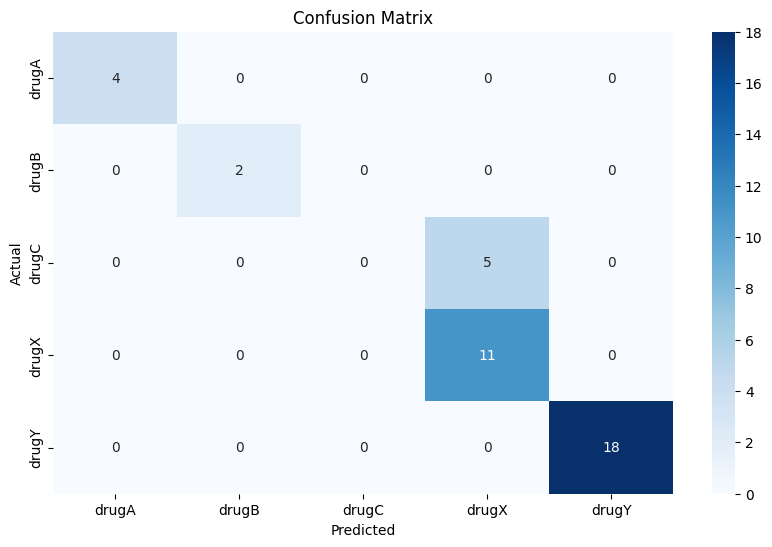

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(matrics, annot=True, fmt='d', cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

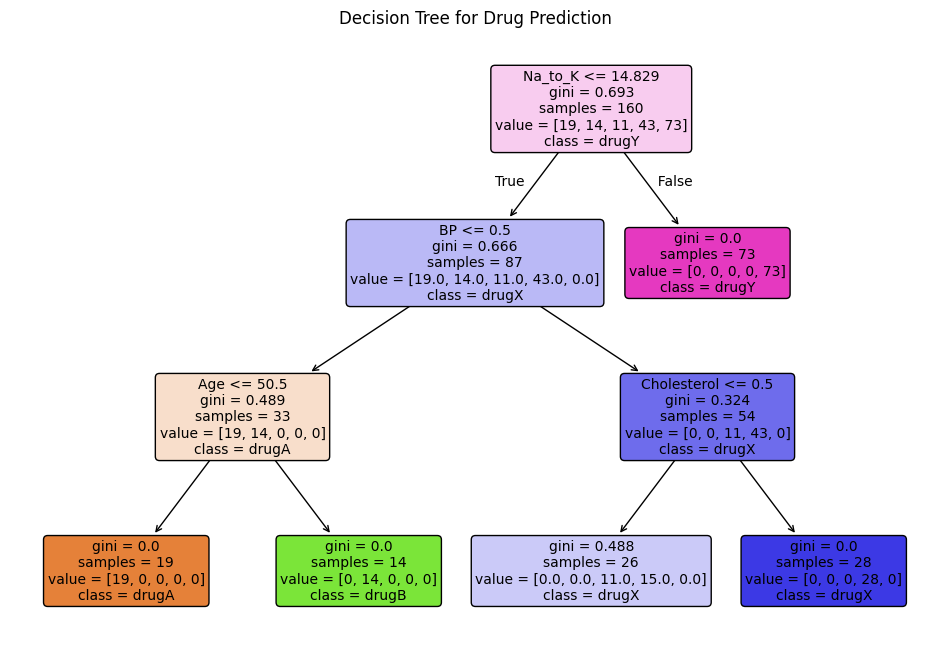

In [11]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names= x.columns, class_names= le_drug.inverse_transform(sorted(y.unique())),filled = True , rounded = True , fontsize = 10)
plt.title("Decision Tree for Drug Prediction")
plt.show()

In [12]:
new_sex = le_sex.transform(['F'])[0]
new_bp = le_bp.transform(['HIGH'])[0]
new_chol = le_chol.transform(['NORMAL'])[0]

In [13]:
new_data = np.array([[35,new_sex, new_bp,new_chol,15.5]])
prediction = model.predict(new_data)

predicted_drug = le_drug.inverse_transform([prediction])[0]
print(predicted_drug)

drugY


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
